In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [251]:
df=pd.read_csv(r"C:\ML_Analytics\Time_Series_Forecasting\Data\raw\case_data_calls.csv")
df1=pd.read_csv(r"C:\ML_Analytics\Time_Series_Forecasting\Data\raw\case_data_reservations.csv")

In [252]:
df1.head()

,date,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day
0,1/1/2014,1494,7794,0,1,1
1,2/1/2014,2891,20074,0,1,0
2,3/1/2014,2790,17905,0,1,0
3,4/1/2014,2504,10880,0,0,0
4,5/1/2014,1522,8333,0,0,0


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     1155 non-null   object
 1   calls    1155 non-null   int64 
 2   weekday  1155 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 27.2+ KB


In [254]:
df=df.merge(df1,left_on='date',right_on='date')


In [261]:
df['date'] = df['date'].str.replace('/', '-', regex=False)
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          790 non-null    datetime64[ns]
 1   calls                         790 non-null    int64         
 2   weekday                       790 non-null    int64         
 3   reservations_2months_advance  790 non-null    int64         
 4   total_reservations            790 non-null    int64         
 5   summer_break                  790 non-null    int64         
 6   christmas_break               790 non-null    int64         
 7   special_day                   790 non-null    int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 49.5 KB


In [265]:
df.drop(columns='weekday',inplace=True)

## Features are Extracted from the date

In [266]:
df['dayofweek']=df['date'].dt.dayofweek
df['weekday']=df['date'].dt.day_name()
df['quarter']=df['date'].dt.quarter
df['month']=df['date'].dt.month
df['year']=df['date'].dt.year

In [267]:
df['ds']=pd.to_datetime(df['date'],format='%d-%m-%y')
df['y']=df['calls']

In [268]:
df.head()

,date,calls,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day,dayofweek,weekday,quarter,month,year,ds,y
0,2014-01-01,1327,1494,7794,0,1,1,2,Wednesday,1,1,2014,2014-01-01,1327
1,2014-01-02,3417,2891,20074,0,1,0,3,Thursday,1,1,2014,2014-01-02,3417
2,2014-01-03,3178,2790,17905,0,1,0,4,Friday,1,1,2014,2014-01-03,3178
3,2014-01-04,1767,2504,10880,0,0,0,5,Saturday,1,1,2014,2014-01-04,1767
4,2014-01-05,1374,1522,8333,0,0,0,6,Sunday,1,1,2014,2014-01-05,1374


In [269]:
df_timeseries = df[['ds', 'y']]
df_timeseries.head()

,ds,y
0,2014-01-01,1327
1,2014-01-02,3417
2,2014-01-03,3178
3,2014-01-04,1767
4,2014-01-05,1374


## Time Series Plot

Text(0.5, 1.0, 'call volume Trend')

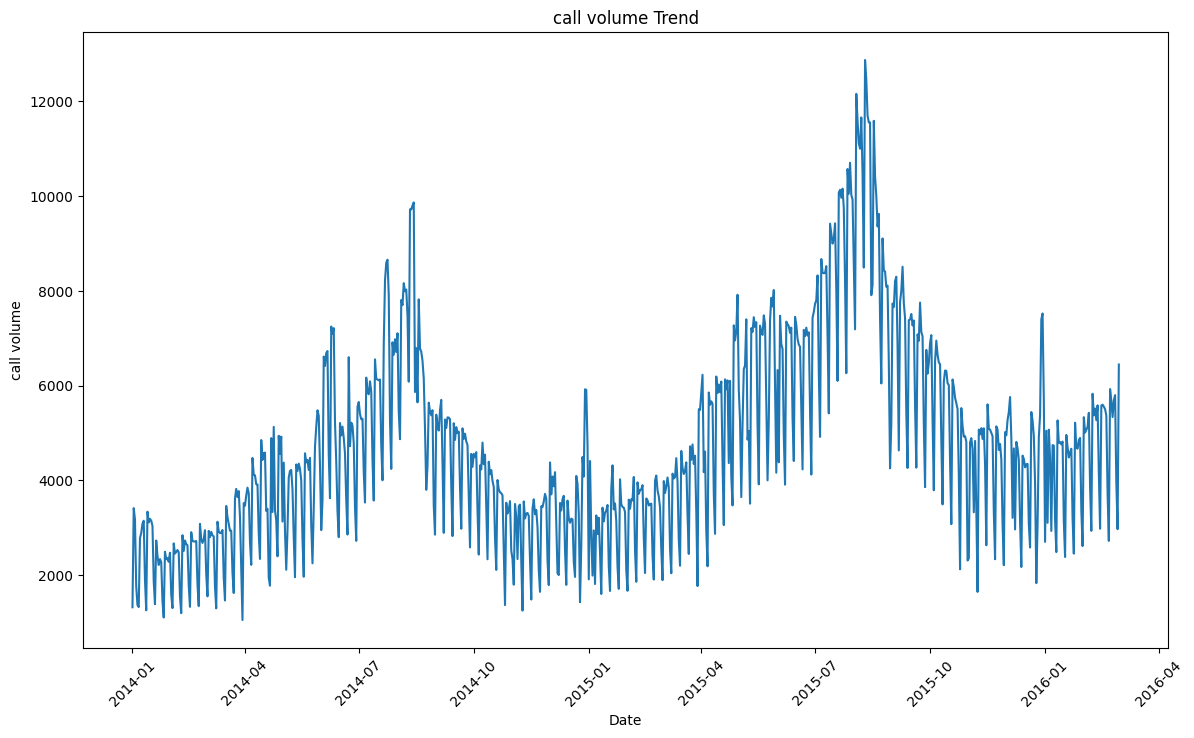

In [270]:
plt.figure(figsize=(14,8))

sns.lineplot(x='ds',y='y',data=df)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('call volume')
plt.title('call volume Trend')


In [271]:
df.count()

date                            790
calls                           790
reservations_2months_advance    790
total_reservations              790
summer_break                    790
christmas_break                 790
special_day                     790
dayofweek                       790
weekday                         790
quarter                         790
month                           790
year                            790
ds                              790
y                               790
dtype: int64

In [ ]:
# Extract dates from boolean columns indicating holidays

summer_break_date=df[df['summer_break']==True]['ds']
christmas_break_date=df[df['christmas_break']==True]['ds']
special_day_date=df[df['christmas_break']==True]['ds']

summer=pd.DataFrame({'holiday':'summer','ds':summer_break_date})
christmas=pd.DataFrame({'holiday':'christmas','ds':christmas_break_date})
special_day=pd.DataFrame({'holiday':'special_day','ds':special_day_date})

holidays=pd.concat((summer,christmas,special_day))

print(holidays)

         holiday         ds
180       summer 2014-06-30
181       summer 2014-07-01
182       summer 2014-07-02
183       summer 2014-07-03
184       summer 2014-07-04
..           ...        ...
727  special_day 2015-12-29
728  special_day 2015-12-30
729  special_day 2015-12-31
730  special_day 2016-01-01
731  special_day 2016-01-02

[179 rows x 2 columns]


In [280]:
holidays = holidays.reset_index(drop=True)

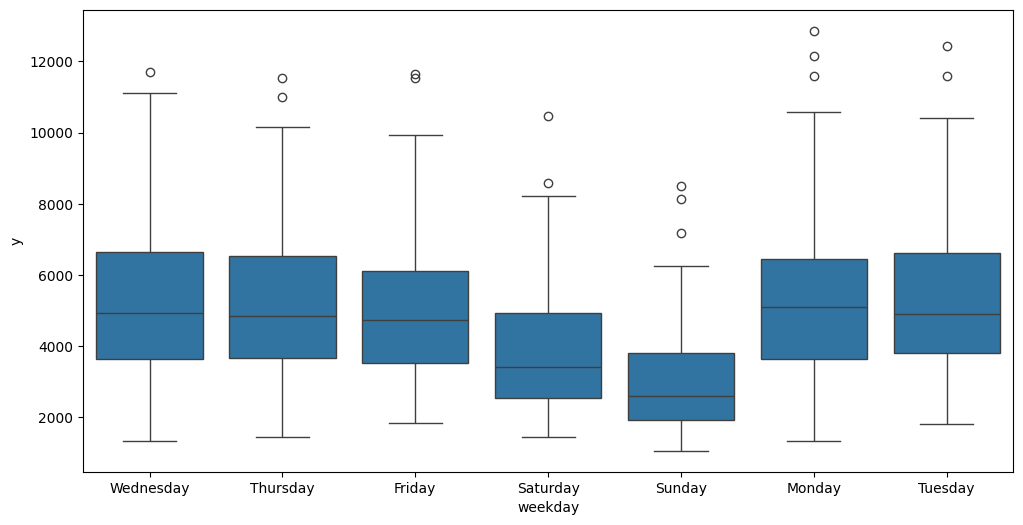

In [285]:
plt.figure(figsize=(12,6))
sns.boxplot(x='weekday',y='y',data=df)
plt.show()

In [287]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   holiday  179 non-null    object        
 1   ds       179 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 2.9+ KB


In [288]:
# Create a set of holiday dates
holiday_dates = set(holidays['ds'])

# Add a boolean column
df['is_holiday']=df['date'].isin(holiday_dates).astype(int)


In [290]:
final_data=df
final_data.drop(columns=['reservations_2months_advance','total_reservations','calls','summer_break','christmas_break','special_day'],inplace=True)

In [292]:
final_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        790 non-null    datetime64[ns]
 1   dayofweek   790 non-null    int32         
 2   weekday     790 non-null    object        
 3   quarter     790 non-null    int32         
 4   month       790 non-null    int32         
 5   year        790 non-null    int32         
 6   ds          790 non-null    datetime64[ns]
 7   y           790 non-null    int64         
 8   is_holiday  790 non-null    int64         
dtypes: datetime64[ns](2), int32(4), int64(2), object(1)
memory usage: 43.3+ KB


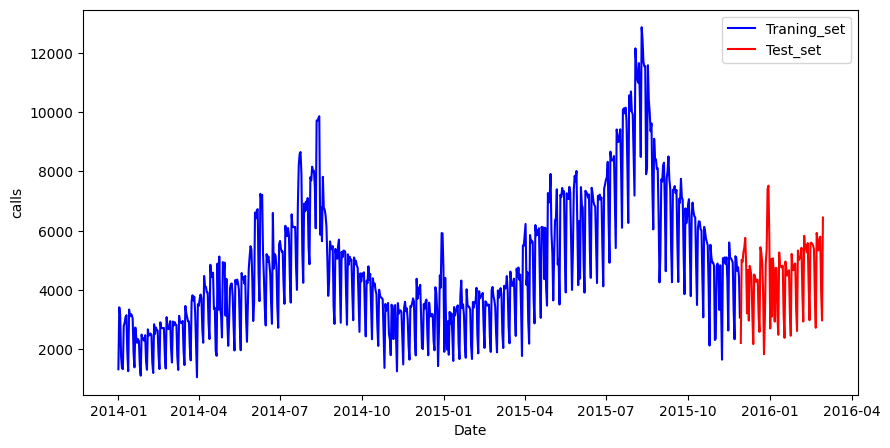

In [395]:
# Calculating Index position for splitting (using recent 3 months)
split_date=final_data['date'].max()-pd.DateOffset(months=3)
split_index=final_data[final_data['date']>=split_date].index[0]

#Split the dataset into training and test sets
train_df=final_data.iloc[:split_index]
test_df=final_data.iloc[split_index:]

# plot the train and test different colors
plt.figure(figsize=(10,5))
plt.plot(train_df['date'],train_df['y'],color='blue',label='Traning_set')
plt.plot(test_df['date'],test_df['y'],color='red',label='Test_set')
plt.xlabel('Date')
plt.ylabel('calls')
plt.legend()
plt.show()

In [386]:
test_df.drop(columns=['weekday','date','ds'],inplace=True)
train_df.drop(columns=['weekday','date','ds'],inplace=True)

C:\Users\Sathish Duraisamy\AppData\Local\Temp\ipykernel_2564\3932414898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(columns=['weekday','date','ds'],inplace=True)
C:\Users\Sathish Duraisamy\AppData\Local\Temp\ipykernel_2564\3932414898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(columns=['weekday','date','ds'],inplace=True)


In [387]:
X_train = train_df.drop(columns='y')
y_train=train_df['y']
X_test = test_df.drop(columns='y')
y_test = test_df['y']

In [ ]:
#build the model
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error

model=XGBRegressor(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=10,
    random_state=42
)

In [389]:
model.fit(X_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [390]:
#Make predications
y_pred=model.predict(X_test)

r2=root_mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)

print(f'r2_score:{r2:.2f},MAE:{mae:.2f}')

r2_score:2178.63,MAE:1623.61


In [391]:
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

In [392]:
test_df

,dayofweek,quarter,month,year,y,is_holiday
697,6,4,11,2015,2214,0
698,0,4,11,2015,5019,0
699,1,4,12,2015,4951,0
700,2,4,12,2015,5276,0
701,3,4,12,2015,5441,0
...,...,...,...,...,...,...
785,3,1,2,2016,5690,0
786,4,1,2,2016,5799,0
787,5,1,2,2016,3949,0
788,6,1,2,2016,2973,0


In [396]:
if 'date' in test_df.columns:
    results_df['Date'] = test_df['date'].values
    results_df = results_df[['Date', 'Actual', 'Predicted']] 

In [397]:
results_df

,Date,Actual,Predicted
0,2015-11-29,2214,2289.690918
1,2015-11-30,5019,5147.158203
2,2015-12-01,4951,5003.097168
3,2015-12-02,5276,4869.180176
4,2015-12-03,5441,4500.115234
...,...,...,...
88,2016-02-25,5690,3661.938721
89,2016-02-26,5799,3737.669434
90,2016-02-27,3949,2584.885254
91,2016-02-28,2973,1900.151001


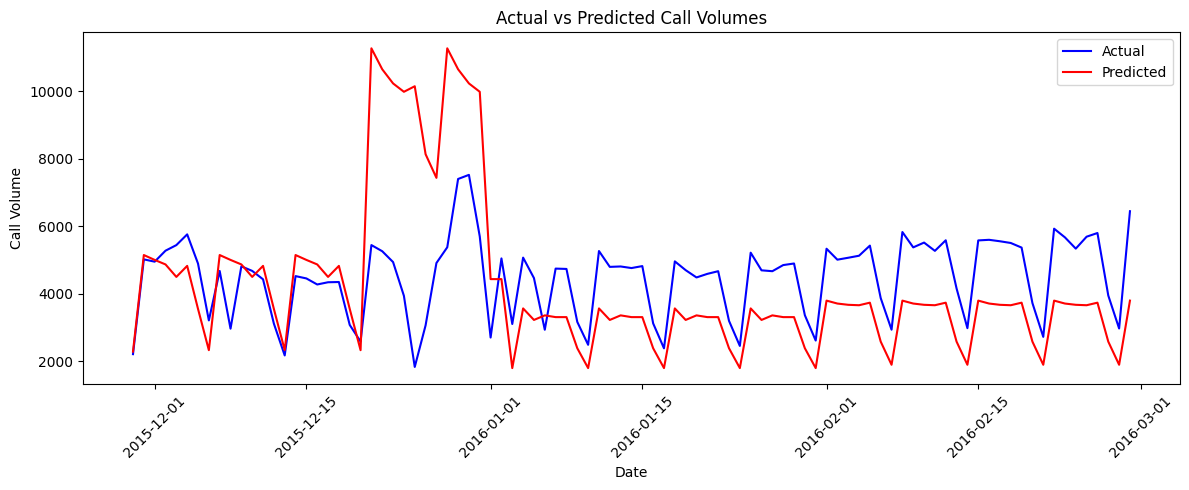

In [398]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(results_df['Date'], results_df['Actual'], label='Actual', color='blue')
plt.plot(results_df['Date'], results_df['Predicted'], label='Predicted', color='red')
plt.title("Actual vs Predicted Call Volumes")
plt.xlabel("Date")
plt.ylabel("Call Volume")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
